## Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import load_csv_data

data_path = "./data/train.csv"
test_path = "./data/test.csv"
sample_path = "./data/sample-submission.csv"

In [2]:
labels, features, ids = load_csv_data(data_path, sub_sample=False)

print(np.isnan(features).sum())
print(features.shape, labels.shape, ids.shape)
print(features[0], labels[0], ids[0])

0
(250000, 30) (250000,) (250000,)
[ 1.38470e+02  5.16550e+01  9.78270e+01  2.79800e+01  9.10000e-01
  1.24711e+02  2.66600e+00  3.06400e+00  4.19280e+01  1.97760e+02
  1.58200e+00  1.39600e+00  2.00000e-01  3.26380e+01  1.01700e+00
  3.81000e-01  5.16260e+01  2.27300e+00 -2.41400e+00  1.68240e+01
 -2.77000e-01  2.58733e+02  2.00000e+00  6.74350e+01  2.15000e+00
  4.44000e-01  4.60620e+01  1.24000e+00 -2.47500e+00  1.13497e+02] 1.0 100000


## Experiments

### 1. Feature Mappings

Many features have high skewed distributions. 
We tried to reduce the tail in the distribution by applying mapping on the features. \
Most of mapping functions are $\log(\cdot)$ or $log(log(\cdot))$. \
We will study the influence of these feature mappings on the performance of the models (MSE GD, LR).

#### 1.1 Feature mappings on MSE GD

running choice=True, degree=1
running choice=True, degree=3
running choice=True, degree=5
running choice=False, degree=1
running choice=False, degree=3
running choice=False, degree=5


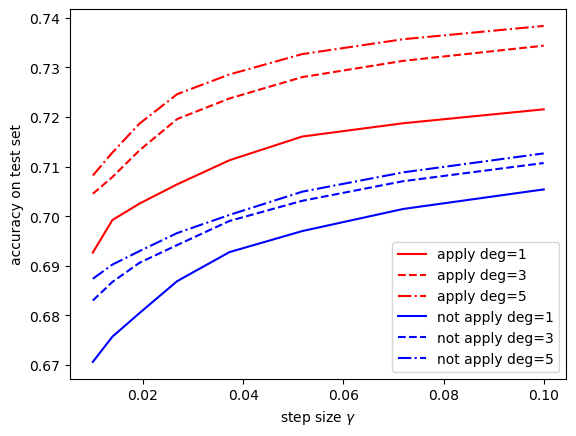

In [10]:
from helpers import train_test_split, compute_loss, accuracy_score,make_prediction
from preprocessing import Preprocessor
from implementations import mean_squared_error_gd

# Training params
max_iter = 1000
gammas = np.logspace(-2, -1, 8)


names = {True:"apply", False:"not apply"}
colors = {True:"red", False:"blue"}
linestyles = {1: '-', 3:'--', 5:'-.'}

for choice in [True, False]:

    for degree, ls in linestyles.items():
        print(f"running choice={choice}, degree={degree}")

        # Feature engineering
        x_tr, x_te, y_tr, y_te = train_test_split(labels, features, 0.8, seed=42)
        prep = Preprocessor()
        x_tr = prep.process_train(x_tr, mapping=choice, poly_degree=degree)
        x_te = prep.process_test(x_te)

        # Model training
        acc = []
        initial_w = np.zeros((x_tr.shape[1]))

        for i, gamma in enumerate(gammas):
            w, l_tr = mean_squared_error_gd(y_tr, x_tr, initial_w, max_iter, gamma)
            acc.append( accuracy_score(y_te, make_prediction(x_te @ w)) )


        plt.plot(gammas, acc, c=colors[choice], linestyle=linestyles[degree], label=f"{names[choice]}, deg={degree}")

plt.ylabel("accuracy on test set")
plt.xlabel("step size $\gamma$")
plt.legend()
plt.show()

#### 1.2 Feature mappings on logistic regression

running choice=True, degree=1
running choice=True, degree=3
running choice=True, degree=5
running choice=False, degree=1
running choice=False, degree=3
running choice=False, degree=5


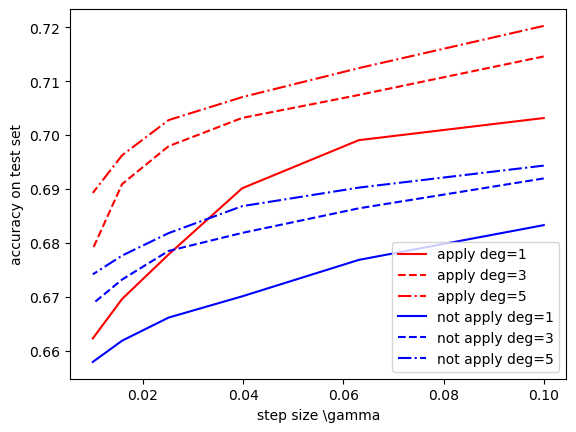

In [12]:
from helpers import train_test_split, sigmoid, accuracy_score, make_prediction
from preprocessing import Preprocessor
from implementations import logistic_regression
labels_01 = 0.5 + labels / 2.

# Training params
max_iter = 1000
gammas = np.logspace(-2, -1, 6)

names = {True:"apply", False:"not apply"}
colors = {True:"red", False:"blue"}
linestyles = {1: '-', 3:'--', 5:'-.'}

for choice in [True, False]:

    for degree, ls in linestyles.items():
        print(f"running choice={choice}, degree={degree}")

        # Feature engineering
        x_tr, x_te, y_tr, y_te = train_test_split(labels_01, features, 0.8, seed=42)
        prep = Preprocessor()
        x_tr = prep.process_train(x_tr, mapping=choice, poly_degree=degree)
        x_te = prep.process_test(x_te)

        # Model training
        acc = []
        initial_w = np.zeros((x_tr.shape[1]))

        for i, gamma in enumerate(gammas):
            w, l_tr = logistic_regression(y_tr, x_tr, initial_w, max_iter, gamma)
            acc.append( accuracy_score(y_te, make_prediction(sigmoid(x_te @ w), logistic=True, zero_one=True)) )


        plt.plot(gammas, acc, c=colors[choice], linestyle=linestyles[degree], label=f"{names[choice]}, deg={degree}")
        
plt.ylabel("accuracy on test set")
plt.xlabel("step size $\gamma$")
plt.legend()
plt.show()

### 2. Polynomial augmentation

#### 2.1 Polynomial augmentation on MSE GD

running MSE-GD: gamma=0.02
running MSE-GD: gamma=0.05
running MSE-GD: gamma=0.1


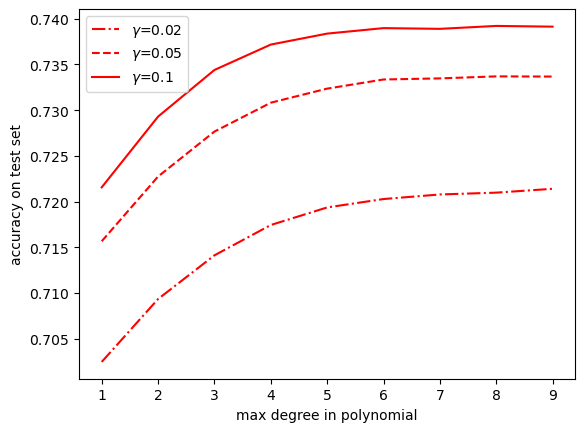

In [18]:
from helpers import train_test_split, compute_loss, accuracy_score,make_prediction
from preprocessing import Preprocessor
from implementations import mean_squared_error_gd

# Training params
max_iter = 1000
degrees = range(1,10)
gammas = {0.02:"-.", 0.05:'--', 0.1:'-'}

for gamma,ls in gammas.items():
    print(f"running MSE-GD: gamma={gamma}")

    acc = []
    for degree in degrees:

        # Feature engineering
        x_tr, x_te, y_tr, y_te = train_test_split(labels, features, 0.8, seed=42)
        prep = Preprocessor()
        x_tr = prep.process_train(x_tr, mapping=True, poly_degree=degree)
        x_te = prep.process_test(x_te)

        # Model training
        initial_w = np.zeros((x_tr.shape[1]))
        w, l_tr = mean_squared_error_gd(y_tr, x_tr, initial_w, max_iter, gamma)
        acc.append( accuracy_score(y_te, make_prediction(x_te @ w)) )

    plt.plot(degrees, acc, c='red', linestyle=ls, label=f"$\gamma$={gamma}")

plt.ylabel("accuracy on test set")
plt.xlabel("max degree in polynomial")
plt.legend()
plt.show()

#### 2.1 Polynomial augmentation on logistic regression

running LR-GD: gamma=0.06
running LR-GD: gamma=0.08
running LR-GD: gamma=0.1


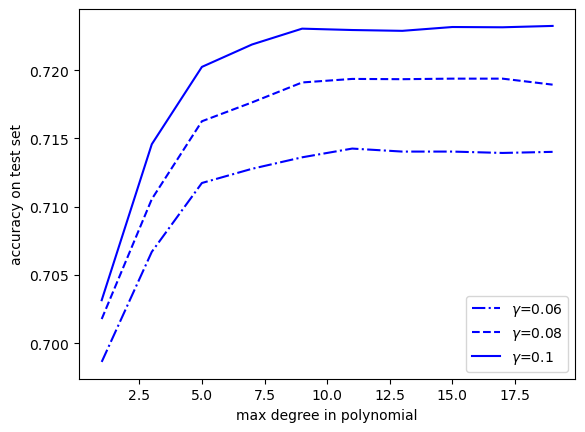

In [29]:
from helpers import train_test_split, sigmoid, accuracy_score, make_prediction
from preprocessing import Preprocessor
from implementations import logistic_regression
labels_01 = 0.5 + labels / 2.

# Training params
max_iter = 1000
degrees = range(1,20,2)
gammas = {0.06:"-.", 0.08:'--', 0.1:'-'}

for gamma,ls in gammas.items():
    print(f"running LR-GD: gamma={gamma}")

    acc = []
    for degree in degrees:

        # Feature engineering
        x_tr, x_te, y_tr, y_te = train_test_split(labels_01, features, 0.8, seed=42)
        prep = Preprocessor()
        x_tr = prep.process_train(x_tr, mapping=True, poly_degree=degree)
        x_te = prep.process_test(x_te)

        # Model training
        initial_w = np.zeros((x_tr.shape[1]))
        w, l_tr = logistic_regression(y_tr, x_tr, initial_w, max_iter, gamma)
        acc.append( accuracy_score(y_te, make_prediction(sigmoid(x_te @ w), logistic=True, zero_one=True)) )

    plt.plot(degrees, acc, c='blue', linestyle=ls, label=f"$\gamma$={gamma}")

plt.ylabel("accuracy on test set")
plt.xlabel("max degree in polynomial")
plt.legend()
plt.show()

### 3. Choice of lambda_ on ridge regression

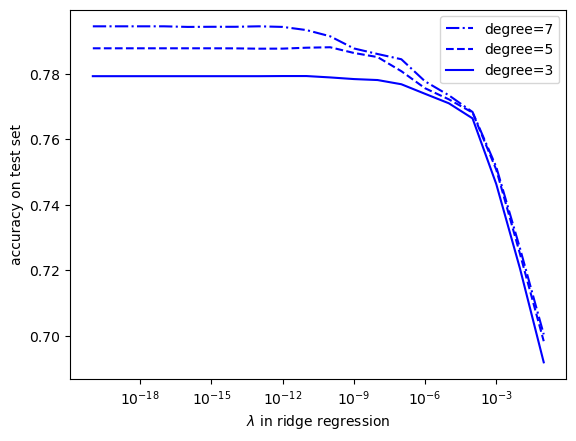

In [35]:
from helpers import train_test_split, compute_loss, accuracy_score,make_prediction
from implementations import ridge_regression

x_tr, x_te, y_tr, y_te = train_test_split(labels, features, ratio=0.8, seed=42)



# Training params
lambdas = np.logspace(-20, -1, 20)
degrees = {7:"-.", 5:'--', 3:'-'}

acc = []
for degree, ls in degrees.items():

    # Feature engineering
    x_tr, x_te, y_tr, y_te = train_test_split(labels, features, 0.8, seed=42)
    prep = Preprocessor()
    x_tr = prep.process_train(x_tr, mapping=True, poly_degree=degree)
    x_te = prep.process_test(x_te)

    # Model training
    acc = []
    for i, lambda_ in enumerate(lambdas):
        w, l_tr = ridge_regression(y_tr, x_tr, lambda_)
        acc.append( accuracy_score(y_te, make_prediction(x_te @ w)) )

    plt.plot(lambdas, acc, c='blue', linestyle=ls, label=f"degree={degree}")

plt.ylabel("accuracy on test set")
plt.xlabel("$\lambda$ in ridge regression")
plt.xscale('log')
plt.legend()
plt.show()


### 4. Regularized Logistic Regression

running RegLR gamma=0.0001
running RegLR gamma=0.00021544346900318845
running RegLR gamma=0.00046415888336127773
running RegLR gamma=0.001
running RegLR gamma=0.002154434690031882
running RegLR gamma=0.004641588833612777
running RegLR gamma=0.01
running RegLR gamma=0.021544346900318822
running RegLR gamma=0.046415888336127774
running RegLR gamma=0.1


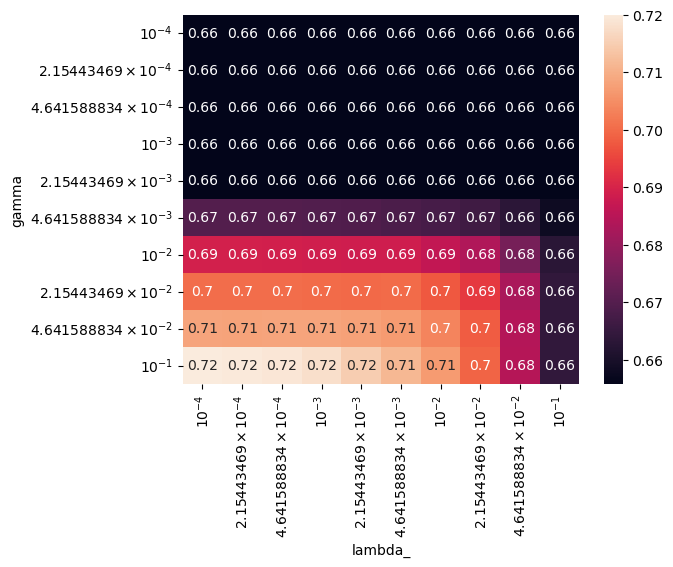

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from helpers import train_test_split, sigmoid, accuracy_score, make_prediction
from implementations import reg_logistic_regression
from preprocessing import Preprocessor
labels_01 = 0.5 + labels / 2.

# Feature engineering
x_tr, x_te, y_tr, y_te = train_test_split(labels_01, features, ratio=0.8, seed=42)
prep = Preprocessor()
x_tr = prep.process_train(x_tr, mapping=True, poly_degree=5)
x_te = prep.process_test(x_te)

max_iter = 1000
lambdas = np.logspace(-4,-1, 10)
gammas = np.logspace(-4, -1,10)

acc_map = np.zeros((len(gammas), len(lambdas)))

for i, gamma in enumerate(gammas):
    print(f"running RegLR gamma={gamma}")
    for j, lambda_ in enumerate(lambdas):

        initial_w = np.zeros((x_tr.shape[1]))
        w, l_tr = reg_logistic_regression(y_tr, x_tr, lambda_, initial_w, max_iter, gamma)

        acc_map[i,j] = accuracy_score(y_te, make_prediction(sigmoid(x_te @ w), logistic=True, zero_one=True))

tick = ticker.ScalarFormatter(useOffset=False, useMathText=True)
tick.set_powerlimits((0,0))
tl = [u"${}$".format(tick.format_data(x)) for x in lambdas]
tg = [u"${}$".format(tick.format_data(x)) for x in gammas]

sns.heatmap(acc_map, annot=True, xticklabels=tl, yticklabels=tg)
plt.xlabel("lambda_")
plt.ylabel("gamma")
plt.show()